 Exploratory Data Analysis (EDA) - Cybersecurity Attacks Dataset  

# Introduction  
This notebook focuses on conducting an **Exploratory Data Analysis (EDA)** of a cybersecurity attack dataset. The goal is to uncover patterns in network traffic, identify potential anomalies, and gain insights into recorded security incidents.  

## Dataset Information  
- **File Name:** `cybersecurity_attacks.csv`  
- **Encoding:** `Windows-1252`  
- **Delimiter:** `,` (comma)  
- **Purpose:** Analyze network activity to understand attack behaviors and prepare the data for further processing.  

## Analysis Steps  
1. **Data Loading and Initial Exploration**  
   - Import the dataset and display the first few records.  
   - Check data types and identify missing values.  
2. **Statistical Overview and Data Distribution**  
   - Examine key variables, including traffic type, protocol, and severity level.  
   - Analyze trends in blocked, logged, and ignored events.  
3. **Pattern Recognition and Trends**  
   - Evaluate attack occurrences over time.  
   - Identify periods with increased cyber activity.  
4. **Outlier and Anomaly Detection**  
   - Investigate unusual network activity based on packet size, source ports, and protocols.  
5. **Data Preparation for Modeling**  
   - Create relevant features for potential machine learning applications.  

## Expected Insights  
- Identify **common attack sources and their characteristics**.  
- Discover **patterns in cybersecurity incidents**.  
- Prepare structured data for **predictive modeling** and further analysis.  

---
Run the cells below to start the analysis.  

In [1]:
# Adding the parent directory to the system path
import sys
sys.path.append('../')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


# Importing the Loguru library for advanced logging
from loguru import logger

In [2]:
# Importing local files

## Importing config for global variables
from cyberattacks.config import *

2025-03-09 10:52:31.967 | INFO     | cyberattacks.config:<module>:11 - PROJ_ROOT path is: /Users/natalia/Documents/projetos/cyberAttack/cyberattacks


In [3]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Show all collumns
pd.set_option('display.max_columns',None)

In [5]:
logger.info("Starting EDA on the Cybersecurity Attacks Dataset")

2025-03-09 10:52:32.425 | INFO     | __main__:<module>:1 - Starting EDA on the Cybersecurity Attacks Dataset


# 1. **Data Loading and Initial Exploration**  

In [6]:
# Importing the dataset from an external file
file_name = f'{EXTERNAL_DATA_DIR}/cybersecurity_attacks.csv'
df = pd.read_csv(file_name, encoding="Windows-1252", sep=",")
logger.info(f'Dataset imported with size: {len(df)}')

2025-03-09 10:52:32.660 | INFO     | __main__:<module>:4 - Dataset imported with size: 40000


In [7]:
df.head(3)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall


## NAN Values analysis

In [8]:
# Counting NAN values
df.isna().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Attack Type                   0
Geo-location Data             0
Network Segment               0
Device Information            0
User Information              0
Severity Level                0
Action Taken                  0
Attack Signature              0
Timestamp                     0
Source IP Address             0
Anomaly Scores                0
Payload Data                  0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Source Port                   0
Destination IP Address        0
Log Source                    0
dtype: int64

In [9]:
# Checking for missing values
missing_df = pd.DataFrame({
    "Column": df.columns,
    "Missing Values": df.isnull().sum().values,
    "Percentage (%)": (df.isnull().sum().values / len(df)) * 100
})

In [10]:
# Filtering only columns that have missing values
missing_df = missing_df[missing_df["Missing Values"] > 0]

In [11]:
# Displaying results
if not missing_df.empty:
    print("Missing Values Analysis:")
    display(missing_df)
else:
    print("No missing values found in the dataset.")

Missing Values Analysis:


,Column,Missing Values,Percentage (%)
10,Malware Indicators,20000,50.0000
12,Alerts/Warnings,20067,50.1675
21,Proxy Information,19851,49.6275
22,Firewall Logs,19961,49.9025
23,IDS/IPS Alerts,20050,50.1250


In [12]:
df.notnull().sum().sort_values(ascending=False)

Timestamp                 40000
Anomaly Scores            40000
Geo-location Data         40000
Network Segment           40000
Device Information        40000
User Information          40000
Severity Level            40000
Action Taken              40000
Attack Signature          40000
Attack Type               40000
Source IP Address         40000
Log Source                40000
Payload Data              40000
Traffic Type              40000
Packet Type               40000
Packet Length             40000
Protocol                  40000
Destination Port          40000
Source Port               40000
Destination IP Address    40000
Proxy Information         20149
Firewall Logs             20039
Malware Indicators        20000
IDS/IPS Alerts            19950
Alerts/Warnings           19933
dtype: int64

## Checking data types


In [13]:
df.dtypes

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

In [14]:
df.nunique().sort_values(ascending=False)

Payload Data              40000
Source IP Address         40000
Destination IP Address    40000
Timestamp                 39997
User Information          32389
Device Information        32104
Destination Port          29895
Source Port               29761
Proxy Information         20148
Anomaly Scores             9826
Geo-location Data          8723
Packet Length              1437
Protocol                      3
Traffic Type                  3
Attack Type                   3
Network Segment               3
Action Taken                  3
Severity Level                3
Log Source                    2
Attack Signature              2
Packet Type                   2
Malware Indicators            1
Firewall Logs                 1
IDS/IPS Alerts                1
Alerts/Warnings               1
dtype: int64

In [15]:
## Checking for duplicates
duplicates = df.duplicated()
duplicates.sum()

np.int64(0)

# 2. **Statistical Overview and Data Distribution**  

## Network traffic analysis

In [16]:
network_traffic_features = ["Source IP Address", 
                           "Destination IP Address", 
                           "Source Port", 
                           "Destination Port", 
                           "Protocol", 
                           "Packet Length", 
                           "Traffic Type"
                           ]

In [17]:
# Display basic statistics for numeric columns
nt_numeric_features = ["Source Port", 
                       "Destination Port", 
                       "Packet Length"
                       ]
df[nt_numeric_features].describe()

,Source Port,Destination Port,Packet Length
count,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725
std,18560.425604,18574.668842,416.044192
min,1027.000000,1024.000000,64.000000
25%,16850.750000,17094.750000,420.000000
50%,32856.000000,33004.500000,782.000000
75%,48928.250000,49287.000000,1143.000000
max,65530.000000,65535.000000,1500.000000


In [18]:
# Display frequency of categorical columns
nt_categorical_vars = ["Protocol", "Traffic Type"]
df[nt_categorical_vars].value_counts()

Protocol  Traffic Type
ICMP      HTTP            4530
          DNS             4513
UDP       FTP             4505
TCP       DNS             4463
          HTTP            4436
UDP       DNS             4400
          HTTP            4394
ICMP      FTP             4386
TCP       FTP             4373
Name: count, dtype: int64

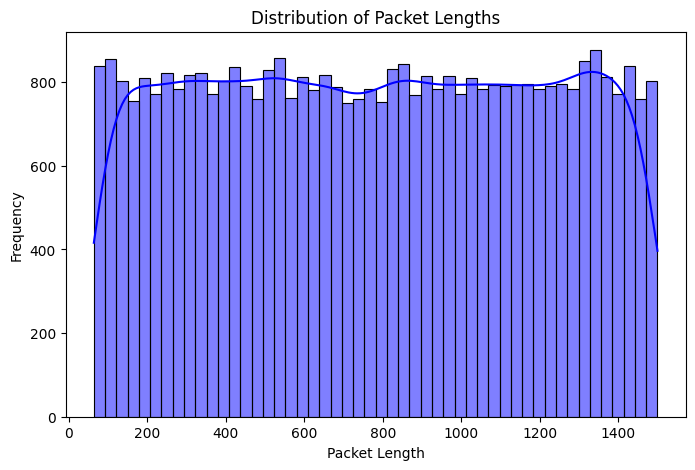

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Packet Length"], bins=50, kde=True, color="blue")
plt.title("Distribution of Packet Lengths")
plt.xlabel("Packet Length")
plt.ylabel("Frequency")
plt.show()

The histogram shows no isolated peaks, suggesting no signs of atypical traffic or massive packet injection attacks, indicating expected network behavior.

In [20]:
# Creating a cross table for Packet Length by Traffic Type
packet_size_by_traffic = df.pivot_table(
    values="Packet Length", 
    index="Traffic Type", 
    aggfunc=["mean", "median", "min", "max", "std"]
)
# Renaming columns
packet_size_by_traffic.columns = ["Mean", "Median", "Min", "Max", "Std Dev"]


# Total Row for the table
packet_size_by_traffic = pd.concat([packet_size_by_traffic, 
    pd.DataFrame(
    [[df["Packet Length"].mean(), df["Packet Length"].median(), df["Packet Length"].min(), 
      df["Packet Length"].max(), df["Packet Length"].std()]],
    
    columns=packet_size_by_traffic.columns,
    index=["Total"]
)])

# Display table
print("Packet Size by Traffic Type:")
display(packet_size_by_traffic)

Packet Size by Traffic Type:


,Mean,Median,Min,Max,Std Dev
DNS,781.031848,785.0,64,1500,415.648566
FTP,780.949563,783.0,64,1500,415.326361
HTTP,782.373653,779.0,64,1500,417.180218
Total,781.452725,782.0,64,1500,416.044192


Packet sizes are fairly consistent across traffic types (DNS, FTP, HTTP), with similar means, medians, and standard deviations, suggesting no significant variation in packet distribution by traffic type.

In [21]:
# Creating a cross table for Packet Length by Severity Level
packet_size_by_severity = df.pivot_table(
    values="Packet Length", 
    index="Severity Level", 
    aggfunc=["mean", "median", "min", "max", "std"]
)

# Renaming columns
packet_size_by_severity.columns = ["Mean", "Median", "Min", "Max", "Std Dev"]

# Total Row for the table
packet_size_by_severity = pd.concat([packet_size_by_severity, 
    pd.DataFrame(
    [[df["Packet Length"].mean(), df["Packet Length"].median(), df["Packet Length"].min(), 
      df["Packet Length"].max(), df["Packet Length"].std()]],
    
    columns=packet_size_by_severity.columns,
    index=["Total"]
)])



# Display table
print("Packet Size by Severity Level:")
display(packet_size_by_severity)

Packet Size by Severity Level:


,Mean,Median,Min,Max,Std Dev
High,780.828576,786.0,64,1500,416.858834
Low,779.920504,778.0,64,1500,416.710555
Medium,783.577894,783.0,64,1500,414.597373
Total,781.452725,782.0,64,1500,416.044192


Packet size remains consistent across severity levels, suggesting it is not a key factor in determining attack severity.

In [22]:
# Creating a cross table for Packet Length by Action Taken
packet_size_by_action = df.pivot_table(
    values="Packet Length", 
    index="Action Taken", 
    aggfunc=["mean", "median", "min", "max", "std"]
)

# Renaming columns
packet_size_by_action.columns = ["Mean", "Median", "Min", "Max", "Std Dev"]


# Total Row for the table
packet_size_by_action = pd.concat([packet_size_by_action, 
    pd.DataFrame(
    [[df["Packet Length"].mean(), df["Packet Length"].median(), df["Packet Length"].min(), 
      df["Packet Length"].max(), df["Packet Length"].std()]],
    
    columns=packet_size_by_action.columns,
    index=["Total"]
)])

# Display table
print("Packet Size by Action Taken:")
display(packet_size_by_action)

Packet Size by Action Taken:


,Mean,Median,Min,Max,Std Dev
Blocked,784.173331,786.0,64,1500,413.469430
Ignored,781.720398,784.0,64,1500,416.980247
Logged,778.393937,774.0,64,1500,417.740723
Total,781.452725,782.0,64,1500,416.044192


Blocked packets have a slightly higher average size than ignored or logged packets, but the differences are minimal, suggesting packet size is not a key factor in action taken.